# Table of Contents

1. [Housekeeping](#house)
2. [Introduction](#intro)
3. [Numpy](#numpy)
4. [Matplotlib](#matplotlib)
5. [PyTorch](#pytorch)
6. [Exercises](#exercises)
7. [Appendix: Colab Instructions](#colab)

In [ ]:
from IPython.display import Image

# Housekeeping <a id="house" />

- Grades for attendance, weekly exercises, and a final project
- Classes and weekly exercises will be given in jupyter notebook form
  through github classrooms, you should upload your answers to github each week
- We will often need access to a gpu.
  - You can use google colab, for which you can turn on gpu/tpus, and
    has easy download/upload to github, and it has the libraries
    already installed
- You will need a github account and a google account (if you use colab)
- Sign up to the first classroom: go to the url and follow the instructions
  - [git.io/ml2021-01](https://git.io/ml2021-01)
- Send an email if you need help with any of this!
  - Some more info on using colab is at the end of the file
- Some references:
  - [Introduction To NumPy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) from "Python Data Science Handbook"
  - [Official pytorch tutorials](https://pytorch.org/tutorials/)
  - [Pytorch tutorials by yunjey, from beginning to advanced](https://github.com/yunjey/pytorch-tutorial)


# Introduction <a id="intro" />

## Machine Learning

- *Machine learning* refers to sets of algorithms (techniques) that
  can "learn" from experience
- Given inputs and expected output can automatically learn to
  associate patterns in the input to the output and generalize on
  unseen inputs.
  - We can think statistically as asking the computer to model the
    probability distributions connecting the inputs and outputs
- As opposed to traditional algorithms which are explicitly programmed
  to always act in specific ways
- Example: Does this signal in my detector correspond to a photon or a
  hadron? Feed the algorithm thousands of (simulated) photons &
  hadrons, and it will learn to distinguish them
  - That is, you build a parameterized model which describes the
    outputs of photons vs. hadrons, and the algorithms changes the
    parameters to better describe the photons or hadron examples you
    feed it
- We will go through this further during the course

## Deep Learning

- **Deep learning** - *learning* refers to machine learning, *deep*
  refers to a special property of the technique but generally means
  the technique operates on much lower level information than older
  machine learning algorithms, and goes through multiple levels of
  processing (all automated by the learning algorithms, of course)
- Ex: in the old days (pre-2012), image recognition might proceed by first using
  specialized edge detectors feeding to specialized shape detectors
  feeding to machine learning algorithms operating on high level
  info. Today, we would just feed raw pixels into a deep learning
  algorithm and let it figure out the intermediate representations.

## Deep Learning Applications

- Typical applications include:
- Voice recognition: "Hey Siri" vs all the other phrases you say
  around a phone
- Image classification: cat vs dog, or photon vs hadron
- Image segmentation: draw a box around all the people in this image,
  or e.g. all the galaxies in this image from the Hubble telescope
- Machine translation: this series of utterances in Korean correspond
  to these in English
- Hopefully, you can see how some of these could be useful to us in
  science



# Numpy <a id="numpy" />

- We will be using the `pytorch` deep learning library in this course
  - These days `pytorch` is the most used library by ML researchers
- Need some preliminaries before we start using `pytorch`
- Numpy is a python package providing one main type `ndarray` a fast
  n-dimensional array, and various linear algebra operations for it
- Important for us for two reasons
  - pytorch's `Tensor` type has an API based on `numpy`
  - `ndarray` is used an intermediate in creating and using `Tensor` objects
- Can think of this lesson as a warm-up before seeing the `torch` library
  - Also to make sure we're all comfortable with python and writing code
- First question we'll look at: why do we need a special array type?

- *Reference* [Introduction to NumPy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) from "Python Data Science Handbook"
  - Flip through it for more info/exercises


## Python vs C

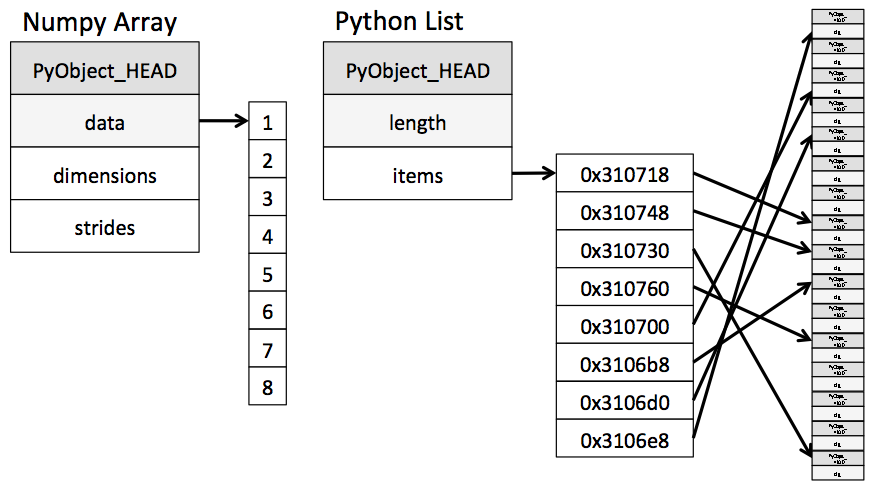

In [ ]:
Image(filename='images/array_vs_list.png')

- Similarly, a C `int` array can be laid out one integer after another
  in memory, and then operated on knowing only the size of `int` and
  the start of the array
- A python list, on the other hand, is a `PyObject` with a pointer to
  the list of objects in the list, each object is again a `PyObject`
- Consider `a[0] + a[0]` in C and in python
  - In python, both the list object and the objects themselves are boxed

## Benefits of NumPy

- Uses a native array datatype
  - A `PyObject`, with some bookkeeping, but pointing directly to a C array
- Provides functions that operate over the $n$-dim. arrays efficiently
  - Built on top of highly-optimised linear algebra packages like BLAS
- **Note:** you can become just as inefficient if you program your loops
  manually, *always use the built-in numpy operations when you can*

## Basic Operations <a id="basic-numpy" />

### Creating arrays in `numpy`


In [ ]:
# import typically shortens the name
import numpy as np

# Create directly from a python list
np.array([1,2,3,4])

array([1, 2, 3, 4])

In [ ]:
# Use a function taking a `shape` : tuple of sizes along each direction
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [ ]:
# outermost dimension first, down to innermost
np.ones((2,3,4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [ ]:
# all numpy objects have a `shape` method
a = np.ones((3,4,5))
a.shape

(3, 4, 5)

In [ ]:
# there are more specialized functions also

# linspace (a,b,n) gives an array with n elements from a to b inclusive
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
# numpy version of range
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# using reshape, you can rearrange the elements of the array to a new shape
np.arange(10).reshape((2,5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [ ]:
# watch out that the shape is sensible
np.arange(10).reshape((3,4))

ValueError: cannot reshape array of size 10 into shape (3,4)

In [ ]:
# To flatten an arbitrary array, use `ravel`
np.arange(4*2*4*2).reshape((4,2,4,2)).ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

### Array Indexing

You can index numpy arrays as for normal lists, but you can also put multiple dimensions in a single bracket

In [ ]:
# usual syntax
np.arange(10)[2:4]

array([2, 3])

In [ ]:
# extract a submatrix, as always, follows outermost to innermost
np.arange(100).reshape((10,10))[2:4,3:7]

array([[23, 24, 25, 26],
       [33, 34, 35, 36]])

In [ ]:
# can access the whole dimension with `:`
np.arange(1000).reshape((10,10,10))[2:4,:,:2]

array([[[200, 201],
        [210, 211],
        [220, 221],
        [230, 231],
        [240, 241],
        [250, 251],
        [260, 261],
        [270, 271],
        [280, 281],
        [290, 291]],

       [[300, 301],
        [310, 311],
        [320, 321],
        [330, 331],
        [340, 341],
        [350, 351],
        [360, 361],
        [370, 371],
        [380, 381],
        [390, 391]]])

In [ ]:
# Note, operating on subarrays will change the original array. They point to the same memory!!!
a = np.linspace(0,1,5)
b = a[2:4] # makes a "view" on the array
b[0] = 101.101
a # the original array is changed!

array([  0.   ,   0.25 , 101.101,   0.75 ,   1.   ])

### Functions with `numpy` arrays

`numpy` has many functions to operate on arrays. Often they generalize the standard python functions to apply to the whole array. Standard math functions also apply element-wise.

In [ ]:
# standard math generalizes (here, element-wise, more on this later)
np.array([1,2,3,4]) + np.array([5,6,7,8])

array([ 6,  8, 10, 12])

In [ ]:
# standard math functions are also available and apply element-wise
np.sin(np.linspace(0,np.pi/2,4))

array([0.       , 0.5      , 0.8660254, 1.       ])

There are also functions available from the array itself

In [ ]:
# you can transpose matrices
np.array([[2,3,1],
          [3,4,2],
          [4,5,3]]).transpose()

array([[2, 3, 4],
       [3, 4, 5],
       [1, 2, 3]])

In [ ]:
a = np.array([1,2,3])
# you can list available methods in jupyter using tab
a.
# you can get help with ?
?a.transpose

You should use the built-in functions when available and never iterate over an array! You'll lose the benefits of using numpy in the first place.

You can check with `%%timeit`, which measures the time taken for the cell to run (averaged over several hundred thousand runs, so don't use for very slow code, use `%%time` instead, which runs once)

In [ ]:
%%timeit
np.sin(np.array([1,2,3]))

1.72 µs ± 7.95 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
a = np.array([1,2,3])
for i in range(len(a)):
    a[i] = np.sin(a[i])

5.21 µs ± 29.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%%time
np.sin(np.array([1,2,3]))
       

CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 43.9 µs


array([0.84147098, 0.90929743, 0.14112001])

### Broadcasting

You can also apply arguments in more complicated ways, for example,
you can add a matrix by a row vector, so that each row in the matrix
is added element-wise by the vector


In [ ]:
v = np.array([1,2,3,4])
m = np.array([ [1,2,3,4], [5,6,7,8], [3,4,5,6] ])
m+v


array([[ 2,  4,  6,  8],
       [ 6,  8, 10, 12],
       [ 4,  6,  8, 10]])

This is called *broadcasting* an operation.

The rules are:
- The lower dimension of the two inputs is padded to be the same
  dimension, missing dimensions added on the left with size 1
- Any dimension of size 1 in either array is increased to the same
  size as the other array, by copying the elements
- If the two arrays don't match size after this, then an error is thrown

Some examples:

In [ ]:
# the scalar is shape (1,), so it gets expanded to (1,1): [[1,i]]
# then copied out to (2,2): [[1,1], [1,1]]
np.array([ [1,2], [3,4] ]) + 1


array([[2, 3],
       [4, 5]])

In [ ]:
# shape (2,2) and (2,), so the second array gets expanded to (1,2)
np.array([ [1,2], [3,4] ]) + np.array([5,6])

array([[ 6,  8],
       [ 8, 10]])

In [ ]:
# the vector is shape (2,), so it gets expanded to (1,2): [[5,6]]
# then copied out to (2,2): [[5,6],[5,6]]
# The matrix is shape (2,1) so it will be expanded to (2,2): [[1,1],[3,3]]
np.array([ [1,], [3,] ]) + np.array([5,6])


array([[6, 7],
       [8, 9]])

# A little matplotlib <a id="matplotlib" />

`matplotlib` is a standard plotting library used in python data science. Its nice to use with jupyter, because it will output graphs inline.

You can plot 1d functions with `matplotlib.pyplot.plot(x,y)`.

`x` and `y` should be arrays of the same length


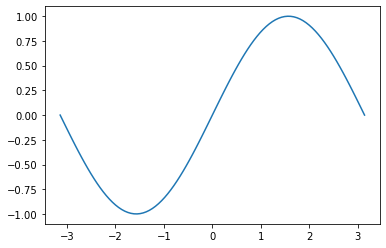

In [ ]:
# typically, the pyplot sublibrary is used, this gives an easy API for plotting
import matplotlib.pyplot as plt # standard way to import
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
plt.plot(x, y)

# PyTorch <a id="pytorch" />
- As a first approximation, pytorch is numpy
- But numpy where the array has special features:
  - Computation can be transferred to the GPU
  - The array keeps track of how its being used, and can be asked to
    give differentials of its elements based on the previous
    calculation
- The first is due to pytorch's integration with *CUDA*,
  we'll look at this property in this lecture
- The second is due to calculations in pytorch being based around a
  *computational graph*, we'll look at this next week
- We'll see in later lectures that these properties form the basis for
  using pytorch as a deep learning library

## GPUs



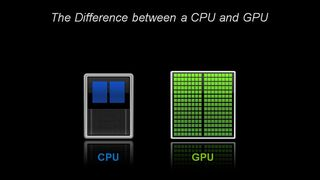

In [ ]:
Image('cpu-gpu.jpg')

- Whats the difference between a CPU and GPU?
- The basic idea is to perform parallel computation
- Good when doing the same operation on lots of data
  - ALU is Arithmetic Logic Unit,
    the part doing the addition/multiplication

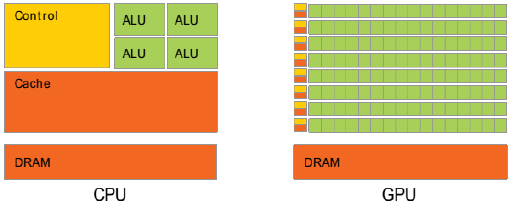

In [ ]:
Image('CPU-vs-GPU-Architecture.png')

| CPU                                    | GPU                                    |
|----------------------------------------|----------------------------------------|
| Central Processing Unit                | Graphics Processing Unit               |
| Several cores                          | Many cores                             |
| Low latency                            | High throughput                        |
| Good for serial processing             | Good for parallel processing           |
| Can do a handful of operations at once | Can do thousands of operations at once |


[NVidia, whats the difference between a cpu and gpu](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/)


## CUDA

- CUDA: Compute Unified Device Architecture
- Nvidia created platform and API for general purpose GPU (GPGPU)
  computations (= computation other than simple graphics work)
- Allows building and executing /compute kernels/ - routines designed
  for parallel computation on GPUs
- Under the hood, Pytorch's GPU processing is built on top of CUDA
- The details are hidden, and unless you have very unusual
  requirements you won't have to touch CUDA directly
  - E.g. need a function that can't be built with standard math
    functions
  - But you will have to worry about getting the libraries linked
    together properly if you setup your own machines
    (`torch` talks to a specific CUDA version)
- If you are interested in seeing direct CUDA access in python, try
  PyCUDA
  - https://documen.tician.de/pycuda/

https://developer.nvidia.com/cuda-faq

## GPUs in Deep Learning



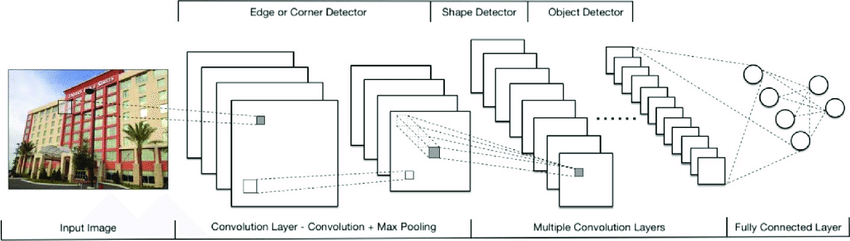

In [ ]:
Image('Illustration-of-Convolutional-Neural-Network-CNN-Architecture.png')

- In Deep Learning, we often use operations such as convolutions:
  - Take some fixed 3x3 matrix (the *convolution kernel*),
    elementwise multiply with a 3x3 patch of an image
  - Sum the output 3x3 matrix to a single number
  - *Do this for every 3x3 patch on the image, forming a new image*
  - Repeat this process on the new image
- On a CPU we would need to do every patch sequentially: one after the
  other. There are many patches, this takes a long time
- With CUDA (using PyTorch), we can arrange the GPU such that each
  patch is done *at the same time*, so each *layer* is created in one step
- To do this, we need to learn how to load data onto the GPU
  - Transfer from CPU memory into GPU memory (with PyTorch)

## PyTorch Tensor

- To begin, lets look at pytorch's basic datatype
- `Tensor` is the basic type of pytorch
  - Can think of it as a numpy ndarray with special features (code below)
- To use it, you must import the `torch` library
  ("Py"Torch because originally Torch was written in lua)


In [ ]:
import torch
torch.tensor([1,2,3,4,5]) # tensors from python lists


tensor([1, 2, 3, 4, 5])

In [ ]:
import numpy as np
torch.tensor(np.array([1,2,3])) # tensors from numpy arrays


tensor([1, 2, 3])

In [ ]:
torch.tensor([1,2,3]) + 2*torch.tensor([4,5,6]) # like numpy

tensor([ 9, 12, 15])

In [ ]:
torch.sin(torch.tensor([0,np.pi/2])) # there are lots of fns (but no pi)

tensor([0., 1.])

- Tensors (also numpy arrays) can store values of different types
- Here, the type is 
- (In older versions, this gave an error, you can pass a torch type to Tensor.type to convert explicitly)

In [ ]:
x = torch.arange(10) # a tensor of integers
y = torch.linspace(0,1,10) # a tensor of floats
x.type(), y.type(), (x+y).type(), y.type(torch.float)


('torch.LongTensor',
 'torch.FloatTensor',
 'torch.FloatTensor',
 tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
         1.0000]))

## Getting data onto the GPU

- Data needs to be transferred before being used for GPU computations
  - Similarly, needs to be put back "onto the cpu" when reading out
- Can use the `cuda()` function, or setup a torch `device` and send it
  `to()` the device
  - Creating a device allows you to check if your system has cuda and
    fallback to the cpu if not
- Can see what device some data is on with `device`
  - For cuda, there is a device number, only important if you have more than one gpu


In [ ]:
torch.tensor([1,2,3]).device

device(type='cpu')

In [ ]:
torch.tensor([1,2,3]).cuda()

tensor([1, 2, 3], device='cuda:0')

In [ ]:
device = torch.device('cuda')
torch.tensor([1,2,3]).to(device)


tensor([1, 2, 3], device='cuda:0')

## Computing with PyTorch devices

- You can do calculations with GPU tensors, results stay on the GPU
  - `torch` has all its functions available for CPU or GPU


In [ ]:
# Calculating sin with the GPU
torch.sin(torch.tensor([0., 1.,2.,3.]).cuda())

tensor([0.0000, 0.8415, 0.9093, 0.1411], device='cuda:0')

In [ ]:
# You can't do a computation with a cuda tensor and a cpu tensor
a = torch.tensor([0.,1.,2.])
b = torch.tensor([0.,1.,2.]).cuda()
a+b


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

# Exercises <a id="exercises" />
## Numpy Exercises
The exercises are included in the ipynb in the repository, you should
do all the exercises and save it to github for marking (see the
following pages for instructions on how to use colab).
=numpy= gives a full range of linear algebra functions operating on
arrays. The exercises will review a few basic operations and go
through some of the linear algebra functions available.
If you need more help, try looking through the:
- *Reference* [Introduction To NumPy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) from "Python Data Science Handbook"

Run this first to import `numpy`. The output value of the final line
of the cell block will be shown in the results section. Note that all
cells are run in a single python interpreter, so variables you define
will remain across cells. If you get into a bad state (e.g. you create
an infinite loop), you can restart the interpreter again by choosing
"Runtime" then "Restart runtime". If you do this, all state will be
lost, so you will need to rerun all the cells.

In [1]:
import numpy as np 


Try running this and see what happens. Is it helpful?

In [ ]:
?np.sin

Now create a 1D array, filled with 5 0s, i.e. the output should show
`array([0., 0., 0., 0., 0.])`

In [ ]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

Create a 1D array with the numbers 1-6. Reshape it to a 3x2 array (3
rows, 2 columns) with rows 1,2 then 3,4, then 5,6

In [ ]:
np.arange(1,7).reshape((3,2))


array([[1, 2],
       [3, 4],
       [5, 6]])

Create a 1D array with the numbers 1-6. Reshape it to a 3x2 array (3
rows, 2 columns) with rows 1,4 then 2,5, then 3,6 (i.e. columns 1,2,3
and 4,5,6). It shouldn't take more than 2 function calls after you
create the array.

In [ ]:
np.arange(1,7).reshape((2,3)).transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

Use `matplotlib.pyplot` and `numpy`'s trig functions to draw the `log`
function from 0.1 to 2. Make sure to sample `log` from enough points
to get a smooth curve. You'll need to import `matplotlib`.

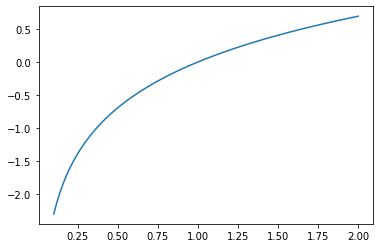

In [ ]:
import matplotlib.pyplot as plt # standard way to import
x = np.linspace(0.1, 2, 100)
y = np.log(x)
plt.plot(x, y)

Draw =sin= and =cos= between 0 and \pi (on one plot)

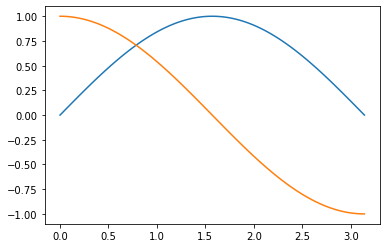

In [ ]:
import matplotlib.pyplot as plt # standard way to import
x = np.linspace(0, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, x, y2)


Create an array of 1 to 10, multiply each element of the array by 5.

In [ ]:
np.arange(1,11) * 5

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

Create a 3x3 matrix like this:
$$A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$$
multiply each element by 3

In [ ]:
A = np.arange(1,10).reshape((3,3))
A * 3

array([[ 3,  6,  9],
       [12, 15, 18],
       [21, 24, 27]])

With the same initial matrix $A$ from the last cell, multiply each
*row* by $(1,2,3)$ (*not* matrix multiplication)

In [ ]:
A * (1,2,3)

array([[ 1,  4,  9],
       [ 8, 20, 36],
       [21, 48, 81]])

With the same initial matrix $A$ from the last cell, multiply each
*column* by $x=(1,2,3)$ (*not* matrix multiplication) (you'll have to
reshape x somehow)

In [ ]:
x = (1,2,3)
A1 = A.transpose()*x
A = A1.transpose()
A

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])

Now, do the standard matrix-vector multiplication $(Ax)_i = \sum_j
A_{ij} x_j$ with A and x from the previous questions. =numpy.matmul=
can do matrix-style multiplication

In [ ]:
A = np.arange(1,10).reshape((3,3))
x = (1,2,3)
np.matmul(A,x)

array([14, 32, 50])

Create a matrix where each element is the square of the corresponding
element of A

In [ ]:
np.square(A)

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

Now, find $A^2$ using matrix multiplication

In [ ]:
np.matmul(A,A)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

Using numpy arrays, sum the numbers from 1 to 1000 (inclusive,
(meaning, include the endpoints)).

In [ ]:
np.sum(np.arange(1,1001))

500500

Using numpy arrays, and sum all the multiples of 3 or 5 from 1
to 1000.
[A shorter example: If we list all the numbers between 1 and 10 that
are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these
multiples is 23.]

[ If you don't know how to start, look up the help for `np.vectorize`
and `np.sum` (look for `where`) ]

In [ ]:
?np.vectorize #?? I dot know well


One final point for numpy. You can list all the objects in numpy and see if theres anything
interesting to you:

In [ ]:
for obj in dir(np):
  print(obj)

ALLOW_THREADS
AxisError
BUFSIZE
CLIP
ComplexWarning
DataSource
ERR_CALL
ERR_DEFAULT
ERR_IGNORE
ERR_LOG
ERR_PRINT
ERR_RAISE
ERR_WARN
FLOATING_POINT_SUPPORT
FPE_DIVIDEBYZERO
FPE_INVALID
FPE_OVERFLOW
FPE_UNDERFLOW
False_
Inf
Infinity
MAXDIMS
MAY_SHARE_BOUNDS
MAY_SHARE_EXACT
MachAr
ModuleDeprecationWarning
NAN
NINF
NZERO
NaN
PINF
PZERO
RAISE
RankWarning
SHIFT_DIVIDEBYZERO
SHIFT_INVALID
SHIFT_OVERFLOW
SHIFT_UNDERFLOW
ScalarType
Tester
TooHardError
True_
UFUNC_BUFSIZE_DEFAULT
UFUNC_PYVALS_NAME
VisibleDeprecationWarning
WRAP
_NoValue
_UFUNC_API
__NUMPY_SETUP__
__all__
__builtins__
__cached__
__config__
__dir__
__doc__
__file__
__getattr__
__git_revision__
__loader__
__name__
__package__
__path__
__spec__
__version__
_add_newdoc_ufunc
_distributor_init
_globals
_mat
_pytesttester
abs
absolute
add
add_docstring
add_newdoc
add_newdoc_ufunc
alen
all
allclose
alltrue
amax
amin
angle
any
append
apply_along_axis
apply_over_axes
arange
arccos
arccosh
arcsin
arcsinh
arctan
arctan2
arctanh
argmax
argmi

## Pytorch Exercise

The exercises will take you through some putting some data on the GPU
and check the speed differences in calculating on the GPU vs CPU.
If you're using colab, you will need to ask colab to setup your
environment with a GPU.  Go to "Runtime" (in the toolbar at the top),
then "Change runtime type", it pops up a box of settings, then change
"Hardware accelerator" from "None" to "GPU" (or TPU, if you want even
more power), then clock "SAVE". If you already started a python
session (you ran some code already), you will need to reset the
runtime before you can use the GPU.

Make sure you can import torch and create a tensor of `[1,2,3]`



In [2]:
import torch
torch.tensor([1,2,3])

tensor([1, 2, 3])

Check if your setup has a GPU. Remember, on colab, you may have to
select the GPU option and then restart the kernel.

To check if you have a CUDA-enabled GPU, you can use e.g. the function
`torch.cuda.device_count`, which returns the number of usable GPUs



In [ ]:
torch.cuda.device_count()

1

The program `nvidia-smi` gives you information about the GPUs
available, you can run it (use the "!" to run a system command in
jupyter) to see information. In my case, I have a 2 GPU machine with some X programs running

In [ ]:
!nvidia-smi


Thu Mar 11 00:04:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Now, move a tensor onto the GPU, say a tensor of `[1,2,3]`

In [ ]:
torch.tensor([1,2,3]).cuda()


tensor([1, 2, 3], device='cuda:0')

Try running `nvidia-smi` again, do you see the change? (actually,
google has some security on, so you won't be able to see the process
as you usually would on a local device, but it should change the
output)

In [ ]:
!nvidia-smi #저 차이가 의미하는 것


Thu Mar 11 00:05:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W /  70W |   1052MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

If you put "%timeit" on a line in a cell, you will get information
about how long the line took to execute. The line will be run several
thousand times in order to get a good estimate (since at any one time,
the computer can be doing several operations as well as running your
code, the time taken fluctuates)

In [ ]:
%timeit 1+1


100000000 loops, best of 5: 7.37 ns per loop


Sidenote: if you have some long running code you want to time only
once, you can use `%time` instead. If you want to time the execution
of the whole cell, instead of one line, you can write `%%timeit` (run
multiple times and average) or `%%time` (run once) as the first line
of the cell. We will stick to `%timeit` for now.
Create a `Tensor` from 0 to \pi, with 1,000,000 elements and store it
in a variable `x`, then pass the `Tensor` through the `torch.sin`
function. Use `%timeit` to see how long this takes to calculate (all
of this on the cpu).


In [ ]:
%%timeit
x = np.linspace(0, np.pi, 1000000)
torch.sin(torch.tensor(x))

100 loops, best of 5: 5.4 ms per loop


Now, try it again, but put the tensor onto the GPU before
calculating.

In [ ]:
%%timeit
x = torch.tensor(np.linspace(0, np.pi, 1000000)).cuda()
torch.sin(x) #여기에는 cuda 안 올리는가. 

100 loops, best of 5: 4.1 ms per loop


It should be faster. Now, instead of storing the `Tensor` in `x`,
create it, transfer it to the GPU and calculate the sin in one line,
and check the `%timeit` results

In [ ]:
%%timeit
torch.sin(torch.tensor(np.linspace(0, np.pi, 1000000)).cuda()).cuda()

100 loops, best of 5: 4.16 ms per loop


Probably you saw that the time was much longer for the GPU than even
the CPU. It takes time to send and recieve that data! As much as
possible, try to limit sending and receiving data to and from the GPU.
Lets try a different problem.

Create a 1000x1000 identity matrix (check `torch.eye`) and store in
`I`, and a 1000-element vector with `torch.arange` in `v` (you will
have to convert to a floating point vector with `.float()`, since
arange gives a long by default and matmul doesn't like mixing
types). Calculate the `torch.matmul` of `I` and `v` with `%timeit`.


In [ ]:
%%timeit
I = torch.eye(1000)
v = torch.arange(1000).float()
torch.matmul(I,v)

1000 loops, best of 5: 497 µs per loop


Do the same but put `I` and `v` on the GPU first

In [ ]:
%%timeit
I = torch.eye(1000).cuda()
v = torch.arange(1000).float().cuda()
torch.matmul(I,v)

1000 loops, best of 5: 1.18 ms per loop


The speed-up should be event bigger. GPUs are designed in the first
place for this kind of matrix multiplication (much of graphics
processing is changing between coordinate systems).
Now, lets look at a few more matrix calculations, use the cpu or gpu
as you like.

As with `numpy`, you can matrix multiply with matmul


In [ ]:
torch.matmul(torch.eye(5), torch.Tensor([1,2,3,4,5]))


tensor([1., 2., 3., 4., 5.])

The `@` symbol is a shorthand for matrix multiplication

In [ ]:
torch.eye(5) @ torch.Tensor([1,2,3,4,5.])


tensor([1., 2., 3., 4., 5.])

You can use the methods `Tensor.inverse()` and `Tensor.t()` to find
the inverse and transpose respectively. `Tensor.view` is another way
to rearrange matrices, like `Tensor.reshape`. The difference is
`reshape` may create a copy of the matrix, `view` will always share
the original, underlying data array. `view` can only be used for
contiguous data (data all joined together in memory), but `reshape`
doesn't impose any such constraints.
Create the matrix 2*I (where I is the identity matrix) and then take
its inverse with `Tensor` functions.


In [ ]:
I =2*torch.eye(2)
torch.inverse(I)

tensor([[0.5000, -0.0000],
        [0.0000, 0.5000]])

Now create a tensor `[0,1,2,3,4,5,6,7,8,9]` (is there a short function
you can use?) and then reshape it to a 3x3 matrix.

In [ ]:
#reshape is impossible so i change arange(0,9)
torch.tensor(np.arange(0,9)).reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

Create the same matrix as the last cell, and take its transpose

In [4]:
a = torch.tensor(np.arange(0,9)).reshape(3,3).t()


We may have some data in X and y that has a linear dependence. Let's
create some example data, which has a linear dependence, with some
random noise $\epsilon$. Note here we are writing the equation $y =
ax+b$, as $y = a x_0 + b x_1$ with $x_0$ always 1 and $x_1=x$, so that
we can use matrix multiplication. Check what `X` and `y` look like to
understand properly.
[note `rand` creates a tensor with entries uniformly distributed in
$[0,1]$].



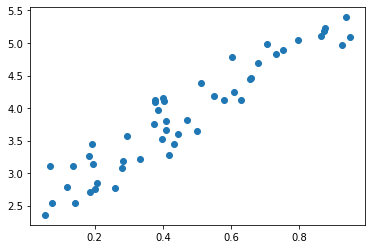

In [5]:
import torch
import matplotlib.pyplot as plt
X = torch.stack((torch.ones(50), torch.rand(50)), axis=1)
# Calculate y = 3x + 2 + epsilon
y = X @ torch.Tensor([2.,3.]) + torch.rand(len(X))
_ = plt.scatter(X[:,1], y)


We may want to find the line of best fit (the line that passes closest
to all the data points).  The solution to this /linear regression/
problem (more on this next week) is $X \beta = y$ is $\beta = (X^T
X)^{-1} X^T y$
Calculate $\beta$ for the given `X` and `y` using pytorch
(i.e. implement the above equation). Draw the datapoints and the line
of best fit on the same plot.

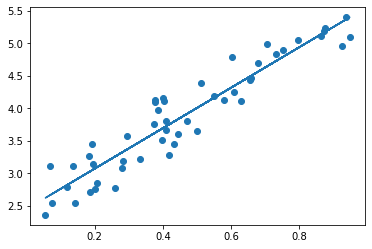

In [8]:
beta=torch.matmul(torch.matmul(torch.matmul(X.t(),X).inverse(),X.t()),y)

_ = plt.scatter(X[:,1], y)
_ = plt.plot(X[:,1], torch.matmul(X,beta))



What are the values of $\beta$ you found? Are they what you expect?
What did you expect and why? (write the answer in a comment).

beta[0] is estimation of 'a(y-intercept)' and beta[1] is estimation of 'b(slope)' in equation  𝑦=𝑎𝑥0+𝑏𝑥1  with  𝑥0  = 1.
It is a linear regression.

# Appendix: Colab Instructions <a id="colab" />
- You need to have a goole account to use colab
- You should also have a [github](https://github.com) account, which is how I
  will mark each weeks assignments
- Sign up for the exercise, it will *fork* (copy) the *repository*
  (codebase) into your github account
- You should follow along the notebook (the document includes the
  lecture notes, and exercises at the bottom of the file) and write
  the solutions into colab, then *commit* (save) your changes for
  marking
- The following pages will take you through the process to load the
  notebook, write your code, and save to github, so the notebook can
  be marked
- [link to colab](https://colab.research.google.com/)
Login to colab and choose open notebook

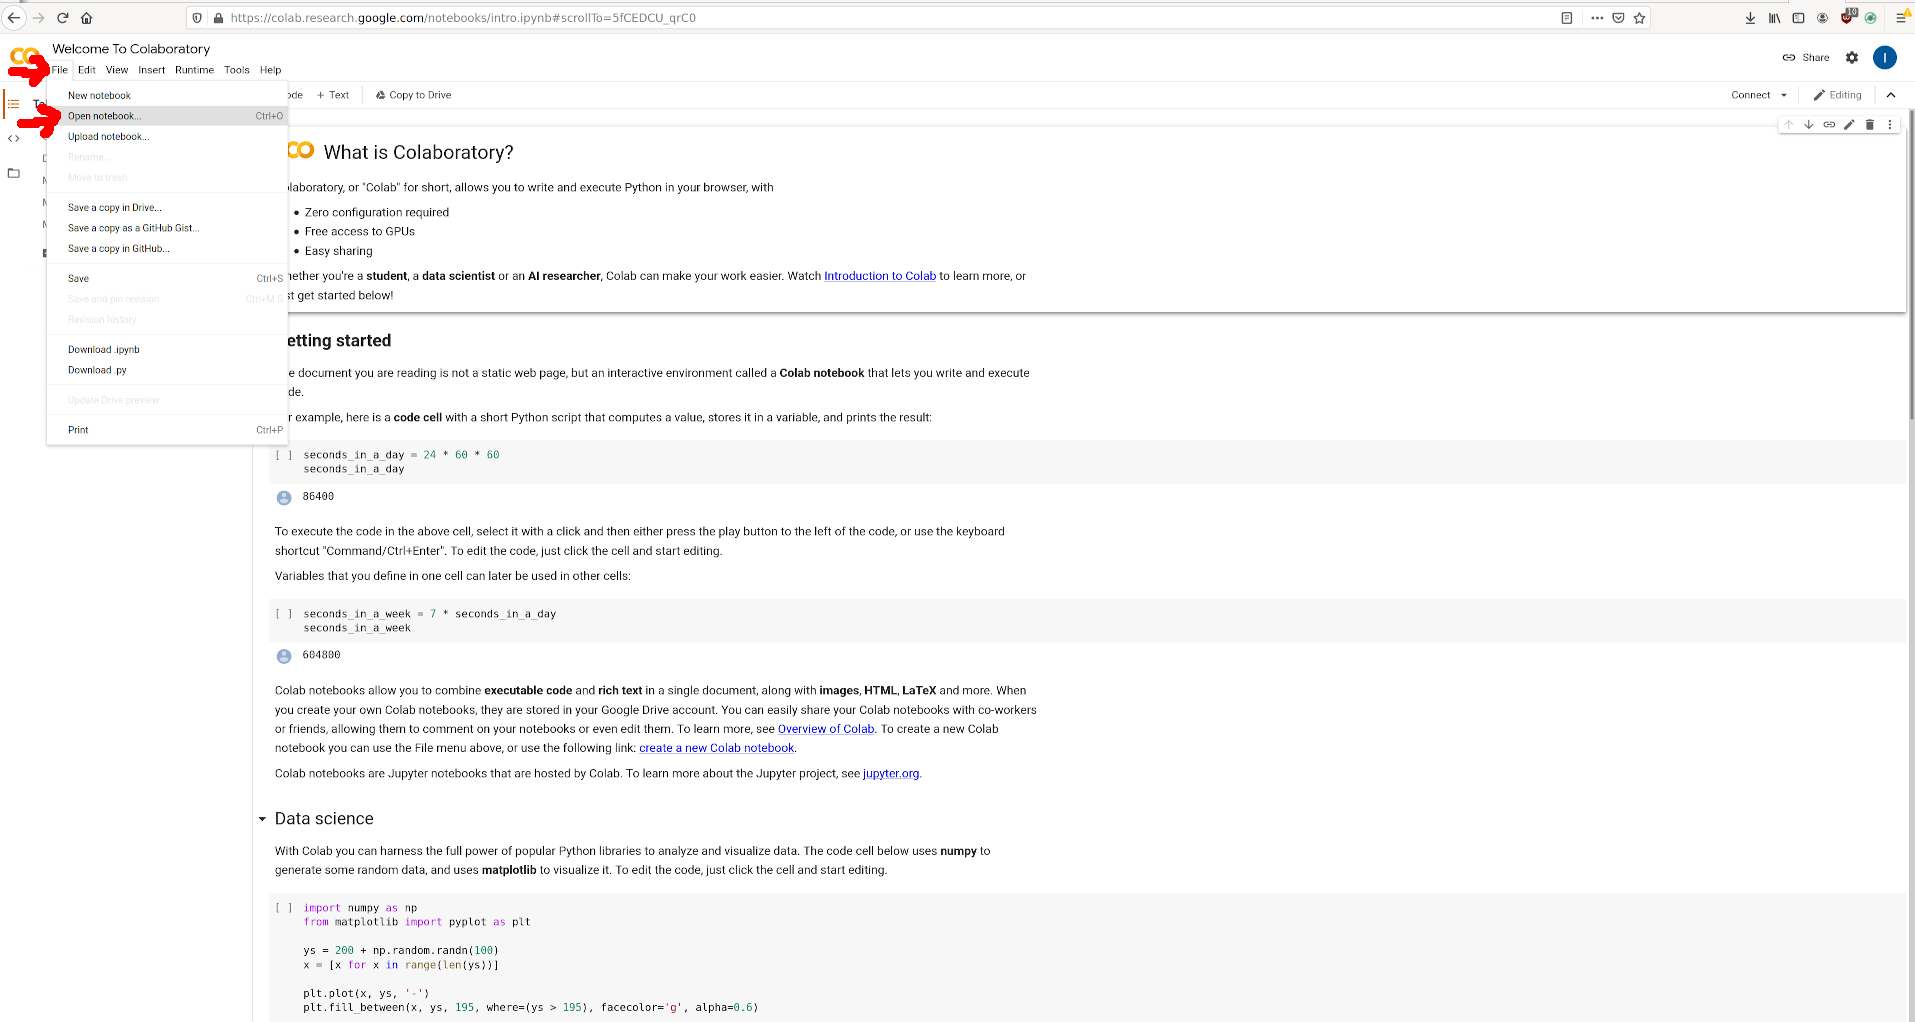

In [ ]:
Image('open_notebook.png')

You will see a table of options, choose "github"

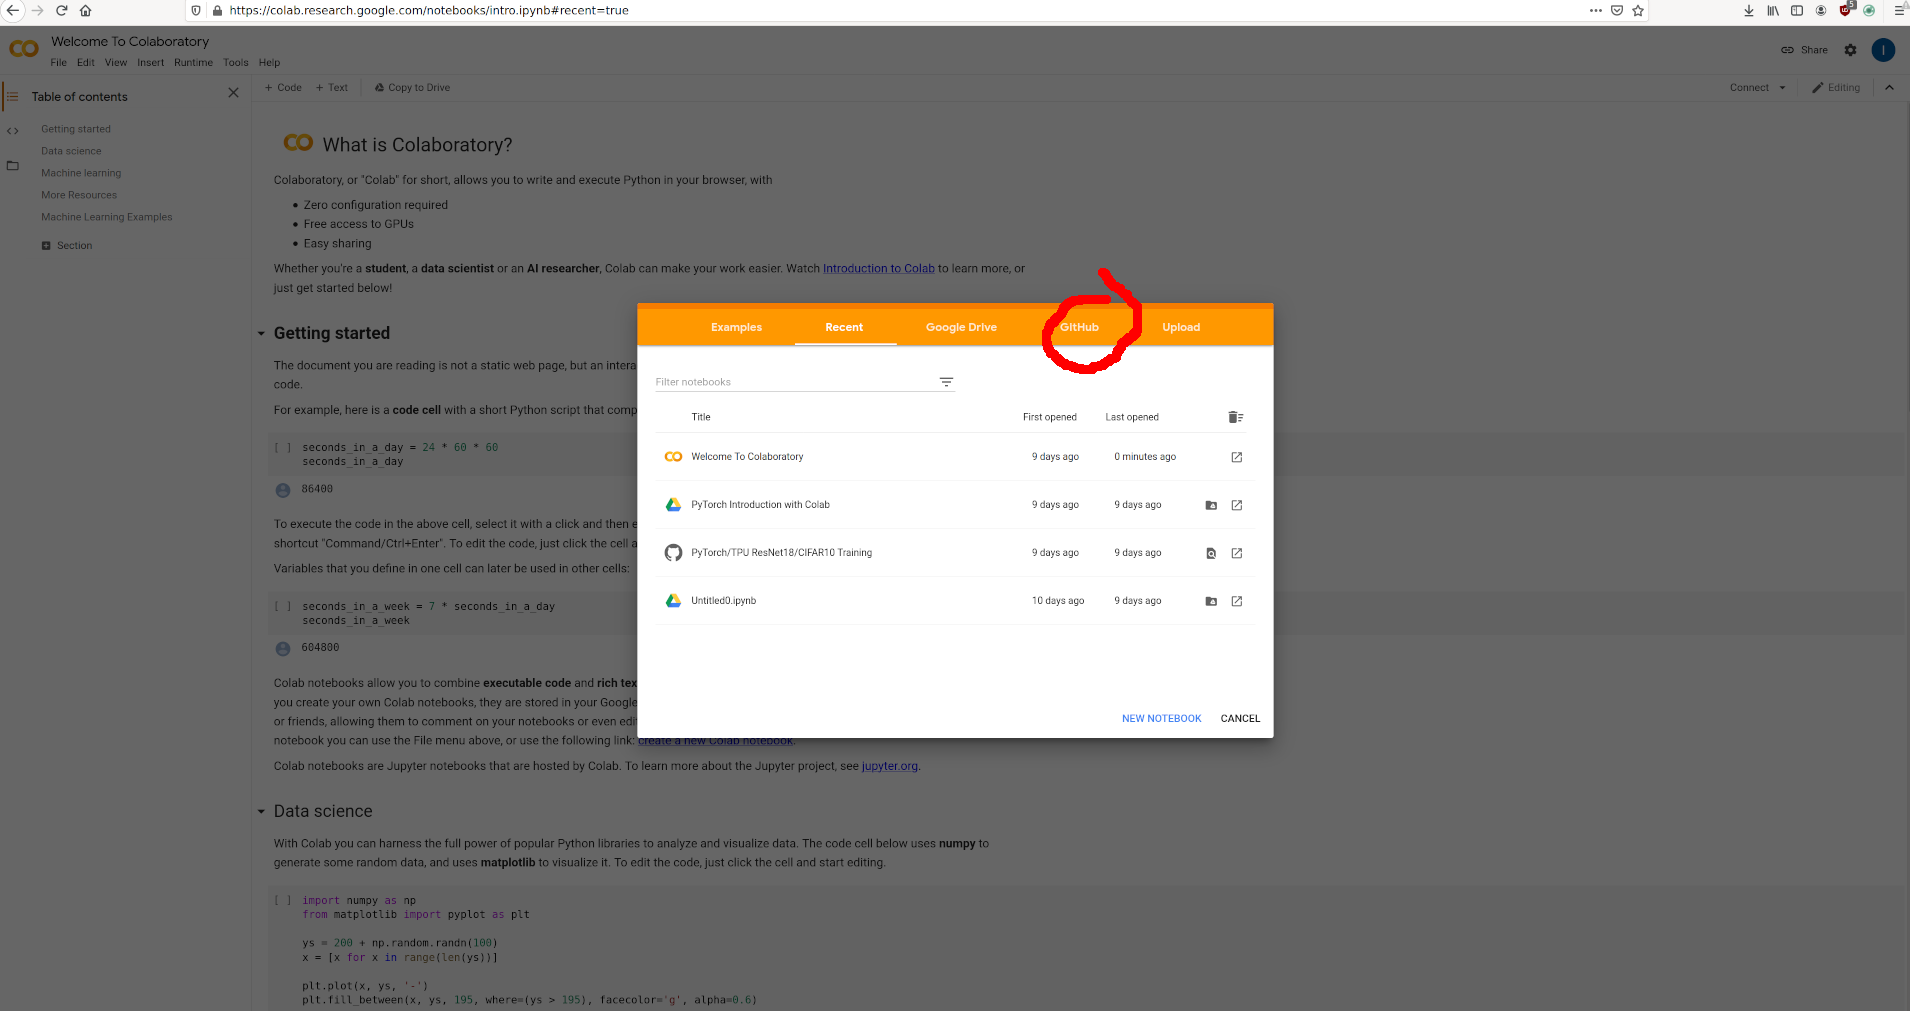

In [ ]:
Image('choose_github.png')

Select "include private repos", this will open a pop-up (make sure to
allow pop ups!) which asks you to sign into github to link you github
to colab. Sign in with your github account details



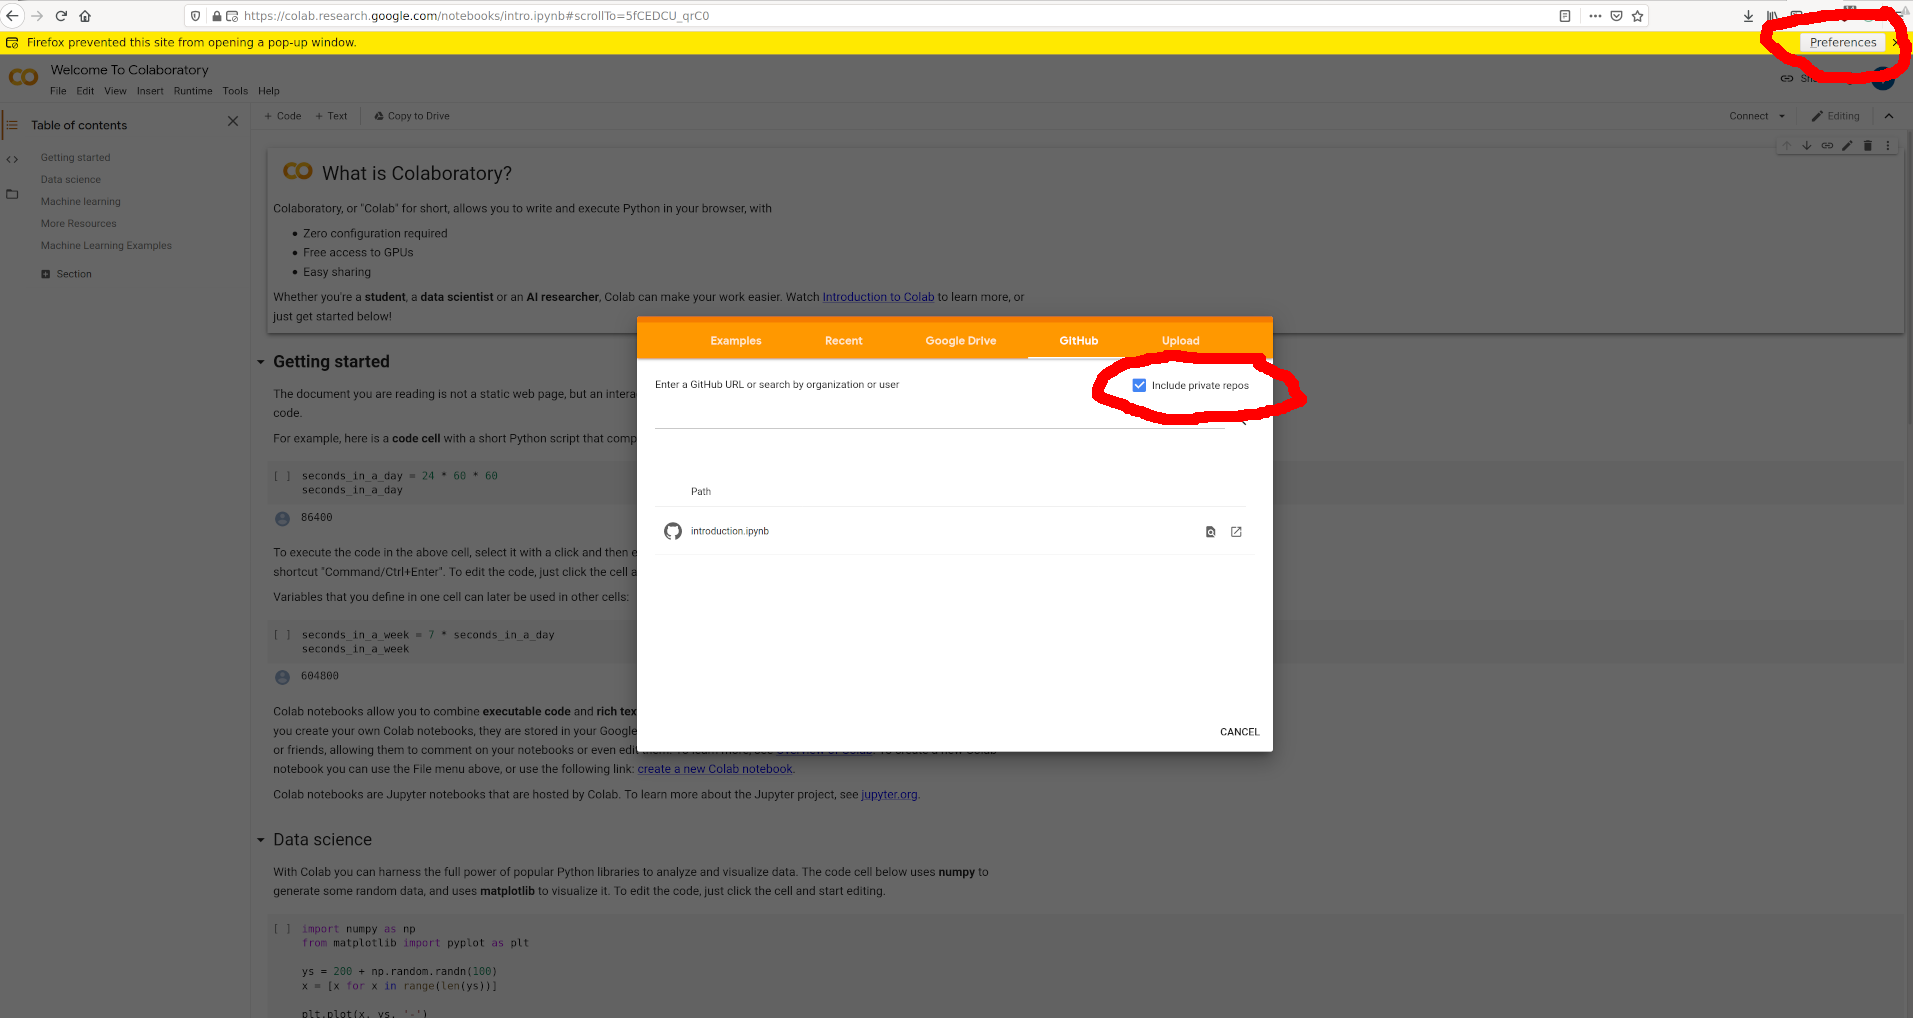

In [ ]:
Image('private_repo.png')

Go to the github repository created when you signed up to class. Find
the github name of your repository (you need the full name, which is
your github name '/' the repository name)



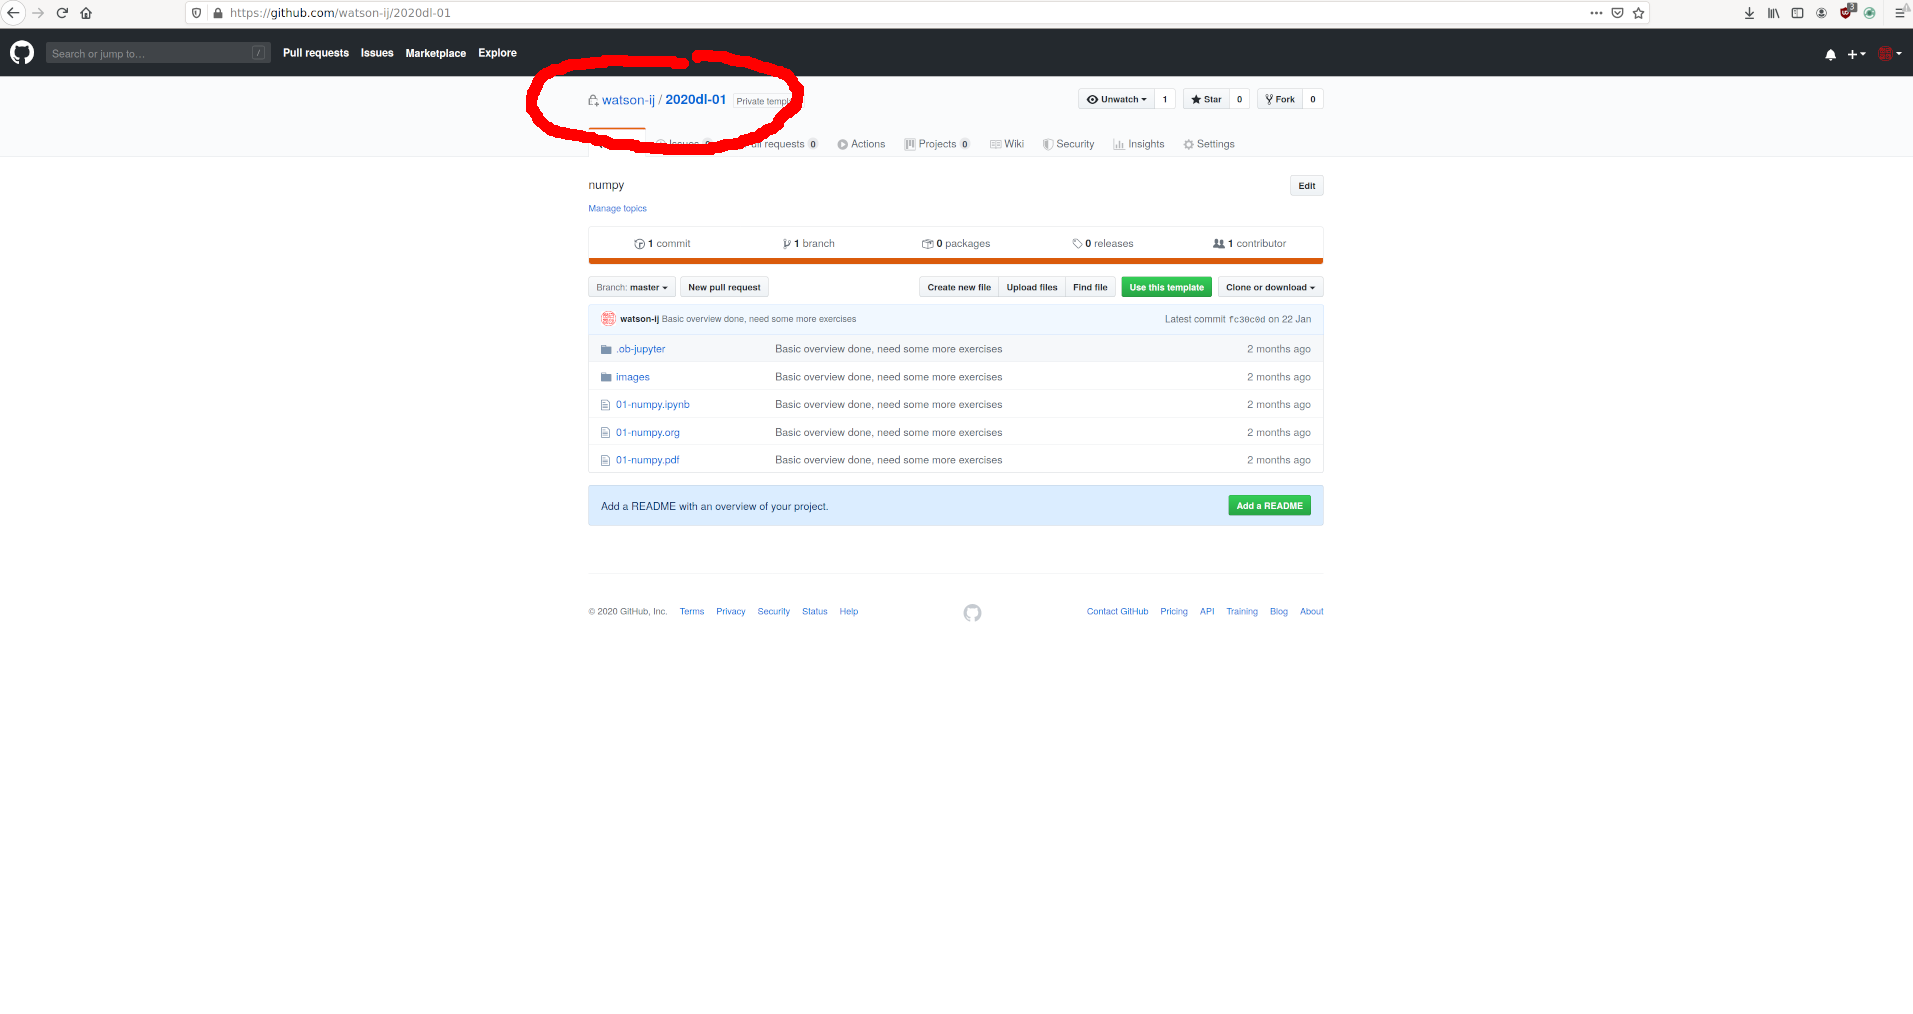

In [ ]:
Image('repo_name.png')

Enter the /full/ repo name in the search, choose the repo in the list
and click the ipynb notebook when it finds your repo (it will need to
authorize github again to open, so wait a minute; ignore the "errors"
and wait)


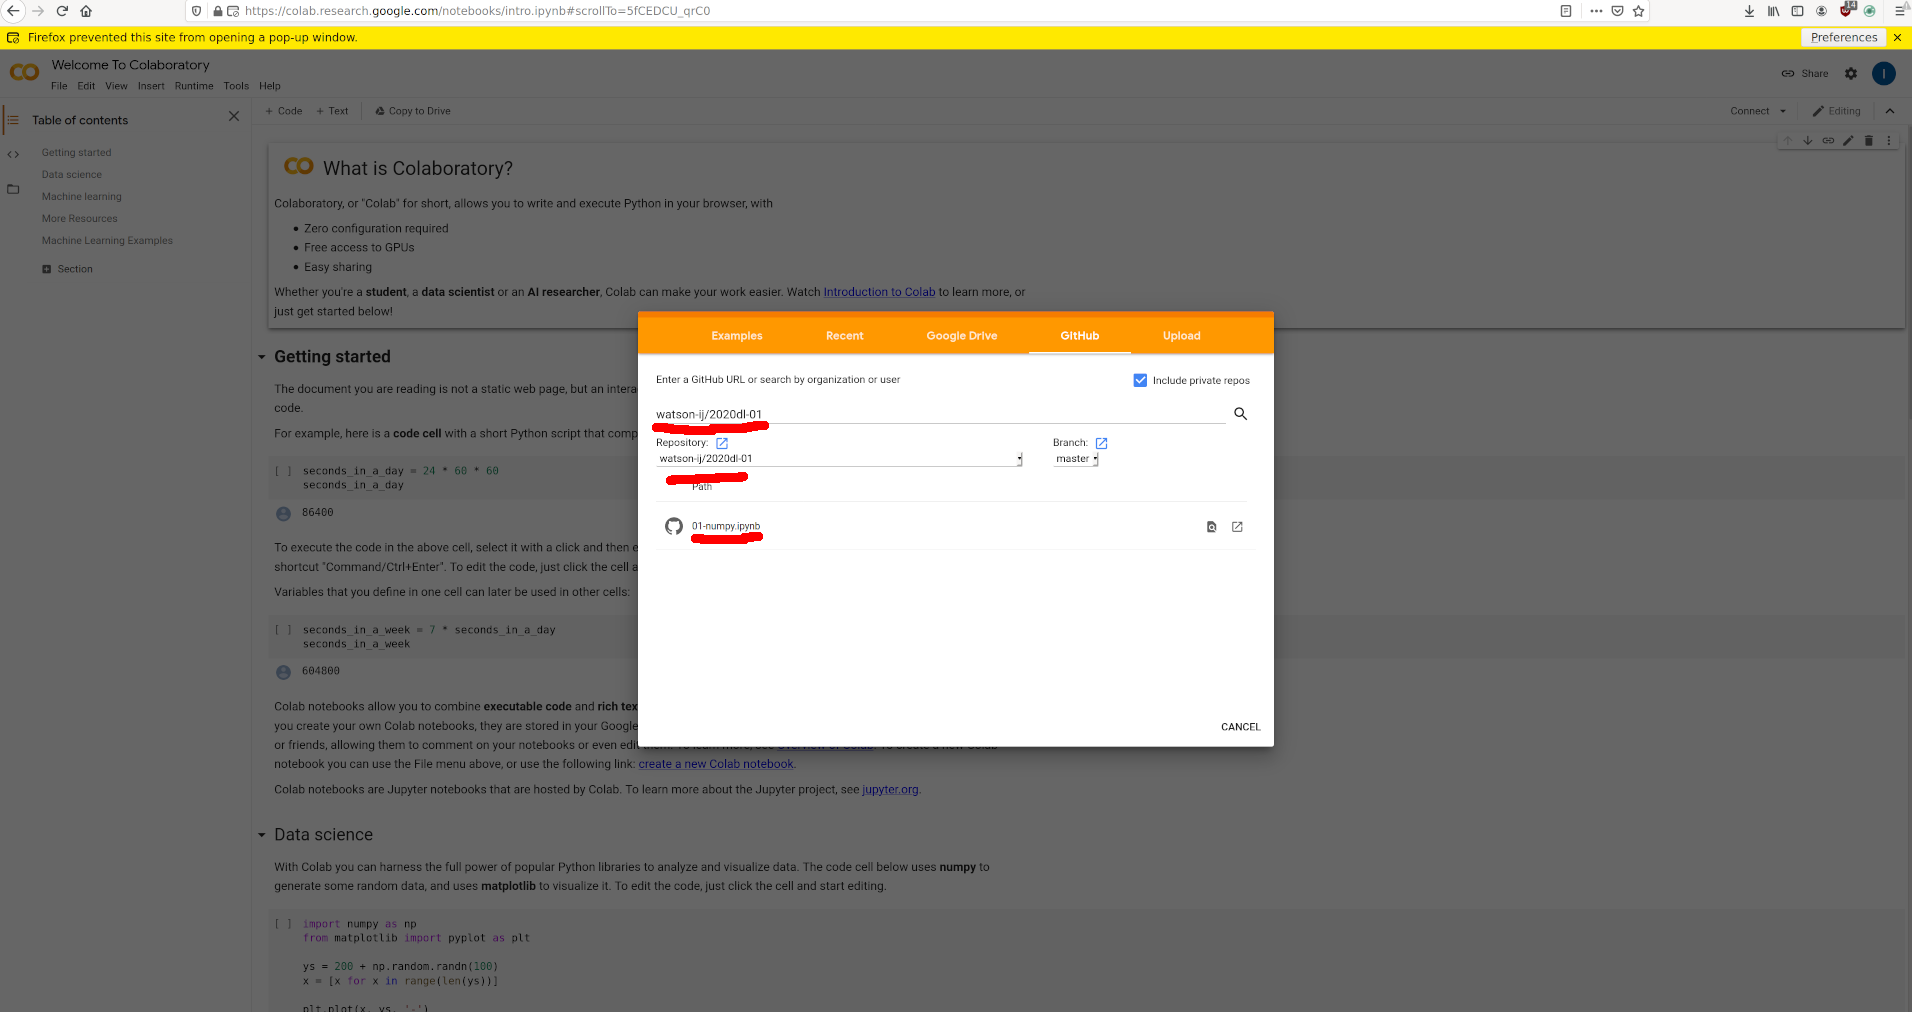

In [ ]:
Image('search_repo.png')

Now you can run your code (scroll down, and click on the "hidden cell"
to reveal them, example shown). Type the code into the boxes and click
the arrow or type "SHIFT+ENTER" to run the code (the first time it
will bring up a warning, click 'run anyway')



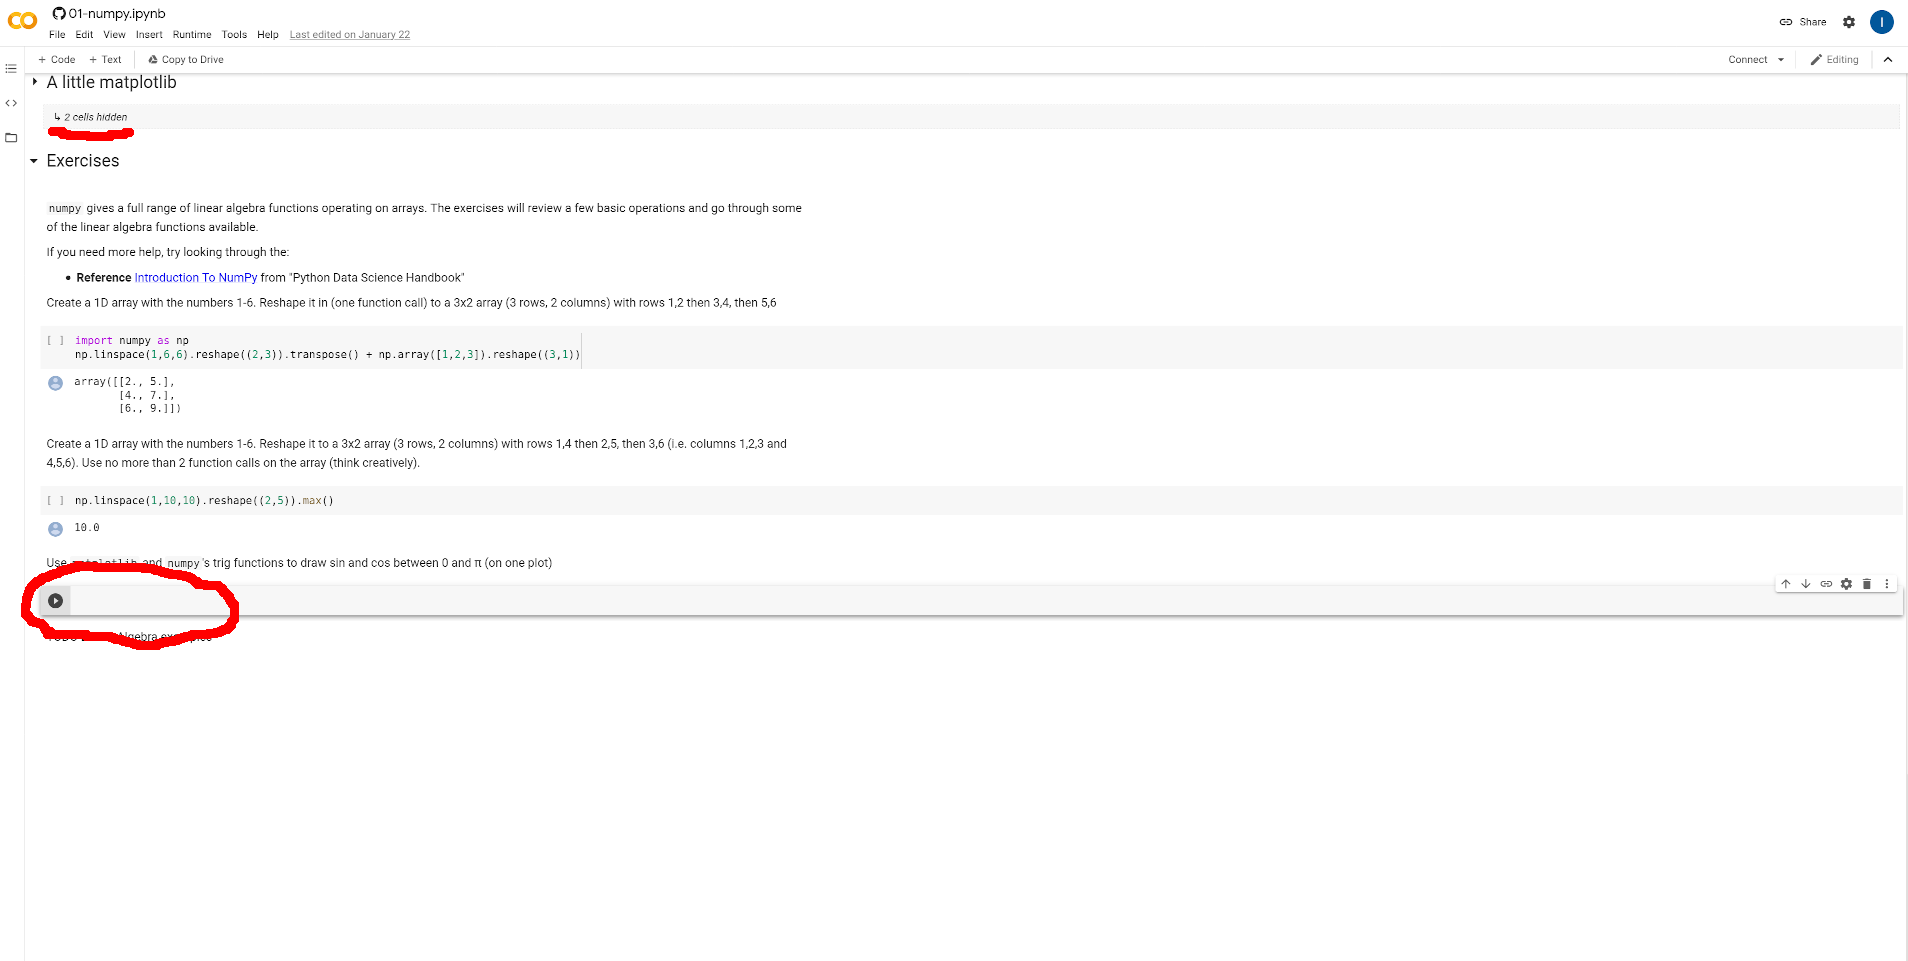

In [ ]:
Image('write_code.png')

When you're done (or need to take a break), save it back to github,
you can reload the repo later (from the "previous notebooks" tab, to
save some time) and it should have all the saved changes. Save as
often as you want, run as much code as you want, its at github and
google's expense!



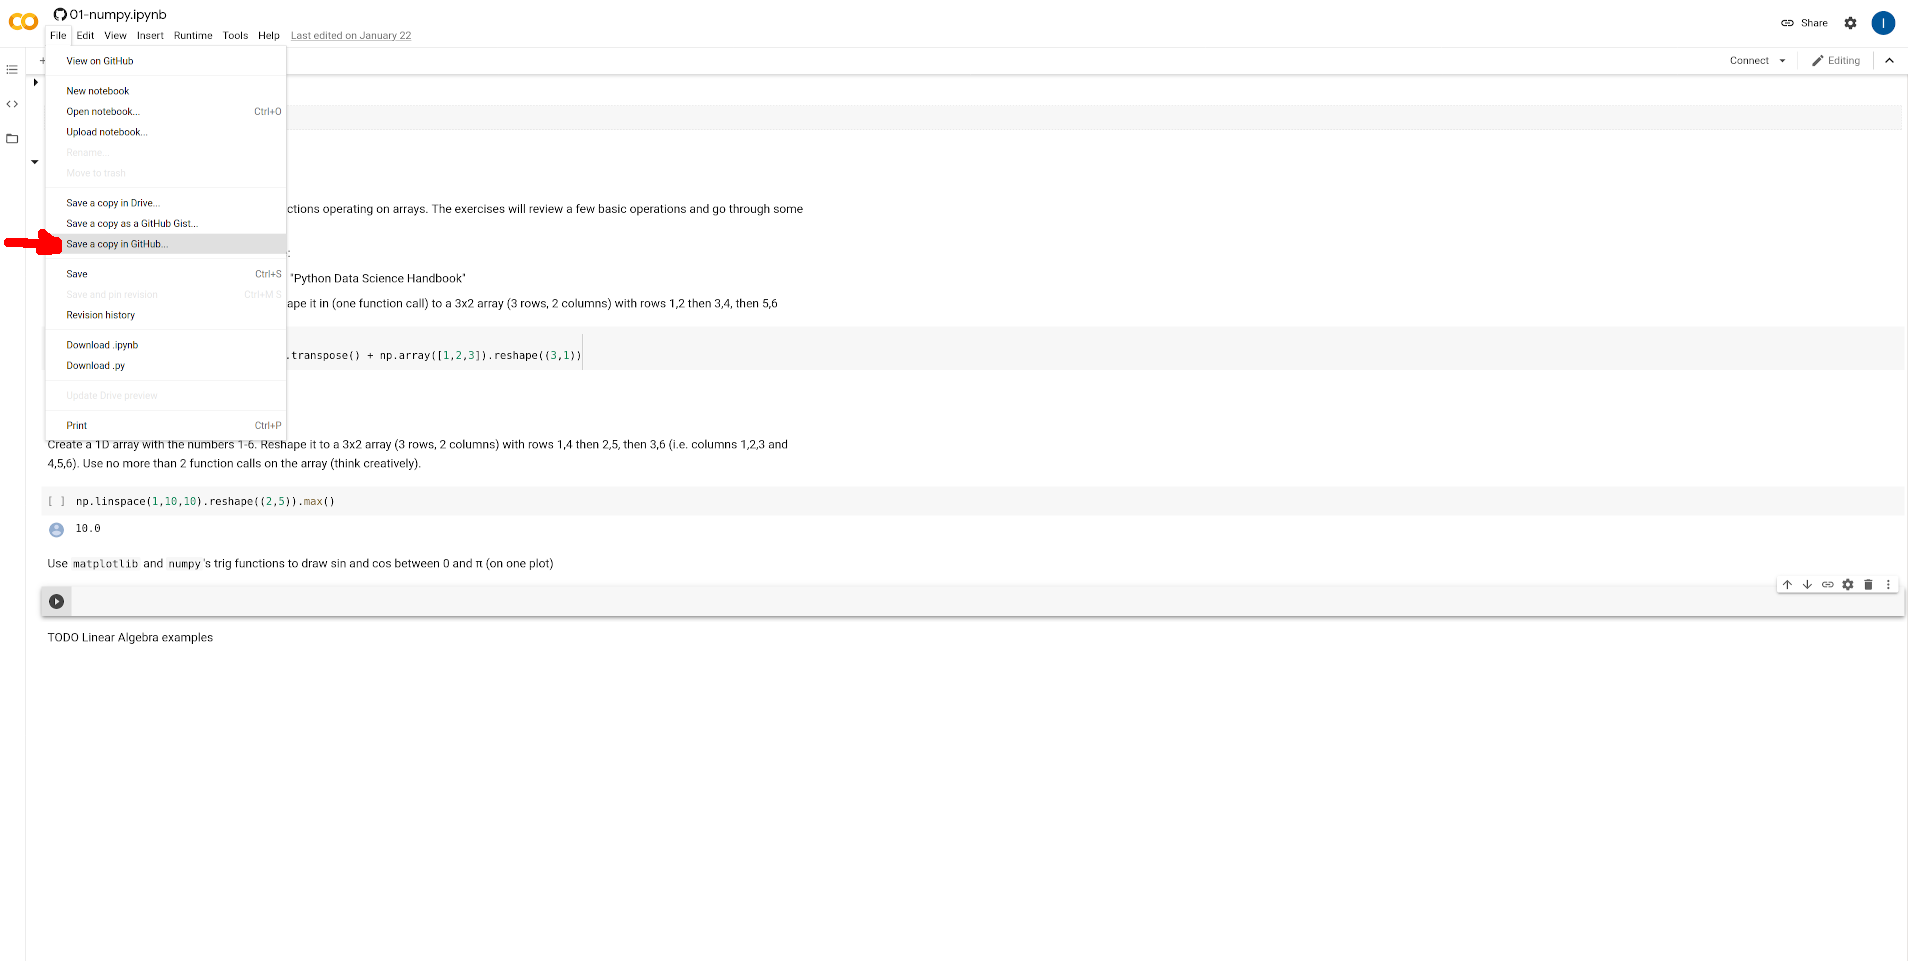

In [ ]:
Image('save_github.png')